In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import copy

%matplotlib inline

# 1. Sans isomorphisme

In [2]:
def all_codes_DAG(n):
    """Renvoie la liste de tous les codes (Passeport,[codes_noeuds]) des DAG de Dijkstra à n+1 sommets"""
    rep = []
    codages = []
    for passeport in Compositions(n):
        codes = [[]]
        layer_courant = 0
        prochain_changement = passeport[0]
        for noeud in range(n):
            if (noeud==prochain_changement):
                layer_courant += 1
                prochain_changement += passeport[layer_courant]
            suffixes = [1] if (layer_courant == 0) else [i for i in range(1,2**passeport[layer_courant - 1])]
            codes = ajoute_suffixes(codes,suffixes)
        for code in codes:
            codages.append((passeport,code))
    return codages


def decode(code, avec_Position = False):
    """Renvoie le DAG associé au code"""
    passeport,codes_noeuds = code
    n = sum(list(passeport))
    G = nx.DiGraph()
    G.add_nodes_from([i for i in range(n)])
    G.add_node(-1)
    
    passeport_somme_partielle = [sum(list(passeport[:i+1])) for i in range(len(passeport))]
    layers_noeuds = [[i for i in range(passeport_somme_partielle[j-1] if j != 0 else 0,passeport_somme_partielle[j])] for j in range(len(passeport))]
    
    
    layer_courant = 0
    prochain_changement = passeport[0]
    for noeud in range(n):
        if (noeud==prochain_changement):
                layer_courant += 1
                prochain_changement += passeport[layer_courant]
                
        code_noeud = codes_noeuds[noeud]
        binaire = toBinaire(code_noeud)
        for i in range(len(binaire)):
            if binaire[i]==1:
                G.add_edge(noeud,-1) if layer_courant==0 else G.add_edge(noeud,layers_noeuds[layer_courant - 1][i])
                
    if avec_Position:
        pos = {}
        pos[-1] = [0,0]
        for layer in range(len(layers_noeuds)):
            for i in range(len(layers_noeuds[layer])):
                noeud = layers_noeuds[layer][i]
                pos[noeud] = [layer+1,i]
        return (G,pos)
                
    return G
    

def toBinaire(n):
    """Renvoie sous forme de liste la décomposition binaire de n"""
    nb = n
    b = []
    while (nb != 0):
        b.append(nb % 2)
        nb = nb//2
    return b
    
    
    
def all_DAG(n, avec_Position = False):
    """Renvoie la liste de tous les DAG de Dijkstra à n+1 sommets"""
    return [decode(code, avec_Position) for code in all_codes_DAG(n)]
            
            
def ajoute_suffixes(mots_prefixes,lettres_suffixes):
    """Renvoie la liste de toutes les compositions possibles prefixe-suffixe"""
    liste_rep = []
    for mot in mots_prefixes:
        for lettre in lettres_suffixes:
            nv_mot = copy.deepcopy(mot)
            nv_mot.append(lettre)
            liste_rep.append(nv_mot)
            
    return liste_rep

In [3]:
for passeport in Compositions(5):
    passeport_somme_partielle = [sum(list(passeport[:i+1])) for i in range(len(passeport))]
    layers_noeuds = [[i for i in range(passeport_somme_partielle[j-1] if j != 0 else 0,passeport_somme_partielle[j])] for j in range(len(passeport))]
    
    print(passeport,passeport_somme_partielle,layers_noeuds)

[1, 1, 1, 1, 1] [1, 2, 3, 4, 5] [[0], [1], [2], [3], [4]]
[1, 1, 1, 2] [1, 2, 3, 5] [[0], [1], [2], [3, 4]]
[1, 1, 2, 1] [1, 2, 4, 5] [[0], [1], [2, 3], [4]]
[1, 1, 3] [1, 2, 5] [[0], [1], [2, 3, 4]]
[1, 2, 1, 1] [1, 3, 4, 5] [[0], [1, 2], [3], [4]]
[1, 2, 2] [1, 3, 5] [[0], [1, 2], [3, 4]]
[1, 3, 1] [1, 4, 5] [[0], [1, 2, 3], [4]]
[1, 4] [1, 5] [[0], [1, 2, 3, 4]]
[2, 1, 1, 1] [2, 3, 4, 5] [[0, 1], [2], [3], [4]]
[2, 1, 2] [2, 3, 5] [[0, 1], [2], [3, 4]]
[2, 2, 1] [2, 4, 5] [[0, 1], [2, 3], [4]]
[2, 3] [2, 5] [[0, 1], [2, 3, 4]]
[3, 1, 1] [3, 4, 5] [[0, 1, 2], [3], [4]]
[3, 2] [3, 5] [[0, 1, 2], [3, 4]]
[4, 1] [4, 5] [[0, 1, 2, 3], [4]]
[5] [5] [[0, 1, 2, 3, 4]]


In [4]:
dags = all_DAG(3)
len(dags)

6

In [5]:
def show_DAG(n, nb_col = 3):
    liste_DAG = all_DAG(n, avec_Position = True)
    taille = len(liste_DAG)
    
    rows = taille//nb_col + 1
    columns = nb_col
    
    fig = plt.figure(figsize=(4*columns, 4*rows))
    
    for i in range(taille):
        dag,position = liste_DAG[i]
        fig.add_subplot(rows, columns, i+1)
        nx.draw_networkx(dag, pos = position)
        plt.axis('off')

In [6]:
all_DAG(3, avec_Position = True)

[(<networkx.classes.digraph.DiGraph object at 0x7fdf4d08bb20>,
  {-1: [0, 0], 0: [1, 0], 1: [2, 0], 2: [3, 0]}),
 (<networkx.classes.digraph.DiGraph object at 0x7fdf4d0881c0>,
  {-1: [0, 0], 0: [1, 0], 1: [2, 0], 2: [2, 1]}),
 (<networkx.classes.digraph.DiGraph object at 0x7fdf4d0880d0>,
  {-1: [0, 0], 0: [1, 0], 1: [1, 1], 2: [2, 0]}),
 (<networkx.classes.digraph.DiGraph object at 0x7fdf4d088370>,
  {-1: [0, 0], 0: [1, 0], 1: [1, 1], 2: [2, 0]}),
 (<networkx.classes.digraph.DiGraph object at 0x7fdf4d08b760>,
  {-1: [0, 0], 0: [1, 0], 1: [1, 1], 2: [2, 0]}),
 (<networkx.classes.digraph.DiGraph object at 0x7fdf4d089b40>,
  {-1: [0, 0], 0: [1, 0], 1: [1, 1], 2: [1, 2]})]

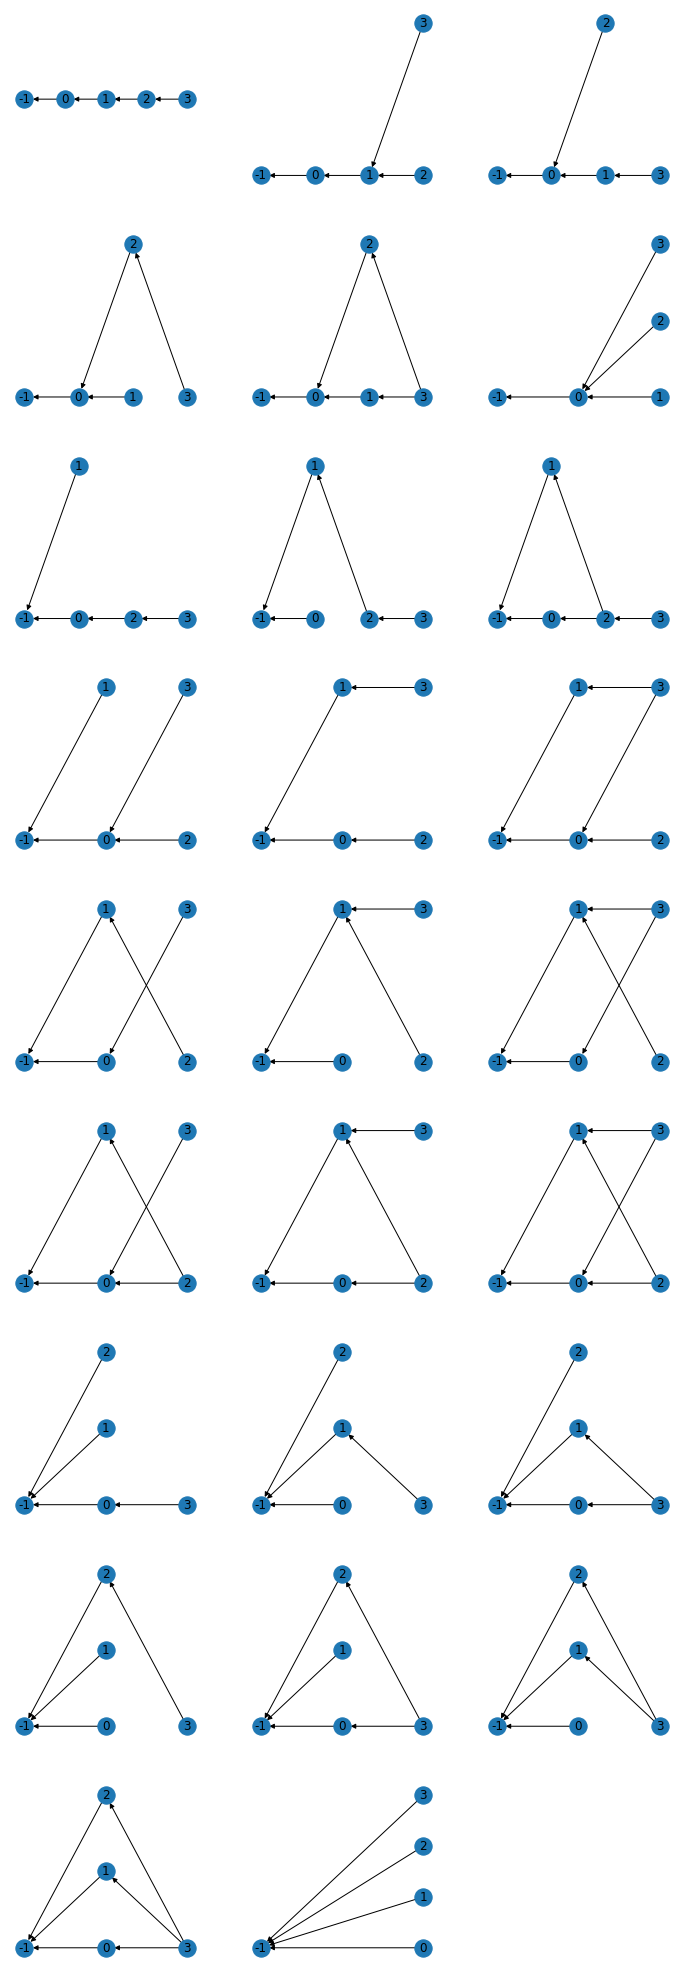

In [8]:
show_DAG(4)

# 2. Avec isomorphisme

In [13]:
dags = all_DAG(3)

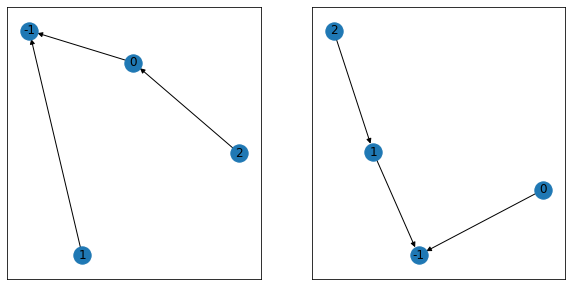

In [14]:
fig = plt.figure(figsize=(10, 5))
fig.add_subplot(1, 2, 1)
nx.draw_networkx(dags[2])
fig.add_subplot(1, 2, 2)
nx.draw_networkx(dags[3])

In [15]:
nx.is_isomorphic(dags[2], dags[3])

True

In [9]:
def all_DAG_iso(n, avec_Position = False):
    dags = all_DAG(n, avec_Position)
    reponse = []
    for dag in dags:
        i = 0
        nv_graphe = True
        while(i<len(reponse) and nv_graphe):
            nv_graphe = not nx.is_isomorphic(dag[0],reponse[i][0]) if avec_Position else not nx.is_isomorphic(dag,reponse[i])
            i += 1
        if (nv_graphe):
            # Isomorphe à aucun DAG dans la liste reponse
            reponse.append(dag)
    return reponse

In [10]:
len(all_DAG_iso(3))

5

In [11]:
def show_DAG_iso(n, nb_col = 3):
    liste_DAG = all_DAG_iso(n, avec_Position = True)
    taille = len(liste_DAG)
    
    rows = taille//nb_col + 1
    columns = nb_col
    
    fig = plt.figure(figsize=(4*columns, 4*rows))
    
    for i in range(taille):
        dag,position = liste_DAG[i]
        fig.add_subplot(rows, columns, i+1)
        nx.draw_networkx(dag, pos = position)
        plt.axis('off')

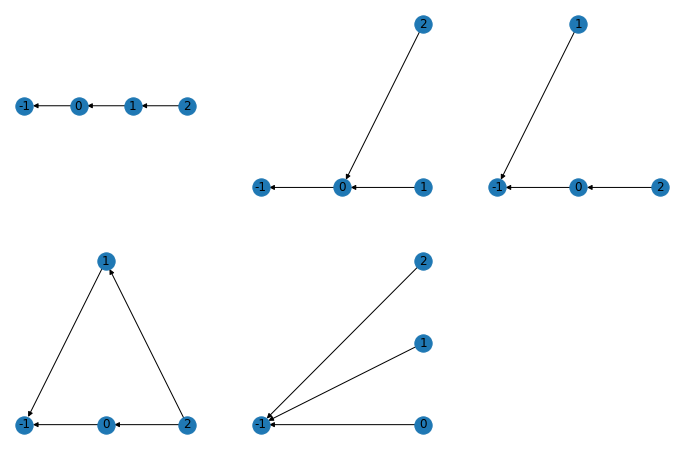

In [12]:
show_DAG_iso(3)

In [16]:
[len(all_DAG_iso(i)) for i in range(1,7)]

[1, 2, 5, 15, 51, 201]

In [139]:
len(all_DAG_iso(7))

909